In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk

In [2]:
# Load your Excel file
df = pd.read_excel("Khulna.xlsx")
df.head()

,Year,Month,Day,Rainfall,Tmin,Tmax
0,1980,1,1,0.0,15.5,25.6
1,1980,1,2,0.0,16.1,25.0
2,1980,1,3,0.0,16.5,22.7
3,1980,1,4,0.0,15.5,-99.9
4,1980,1,5,0.0,14.6,24.6


In [3]:
# Replace -99.9 with NaN
df['Tmax'] = df['Tmax'].replace(-99.9, np.nan)

# Calculate annual average Tmax
annual_tmax = df.dropna(subset=['Tmax']).groupby('Year')['Tmax'].mean().reset_index()

In [4]:
# Mann-Kendall test
result = mk.original_test(annual_tmax['Tmax'])
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=2.0616764220271477e-05, z=4.258104427779446, Tau=0.44608879492600423, s=422.0, var_s=9775.333333333334, slope=0.023397216368106804, intercept=30.876492815118674)


In [5]:
# Create Sen's trend line
years = annual_tmax['Year']
tmax = annual_tmax['Tmax']
slope = result.slope
intercept = tmax.iloc[0]
trend_line = slope * (years - years.min()) + intercept

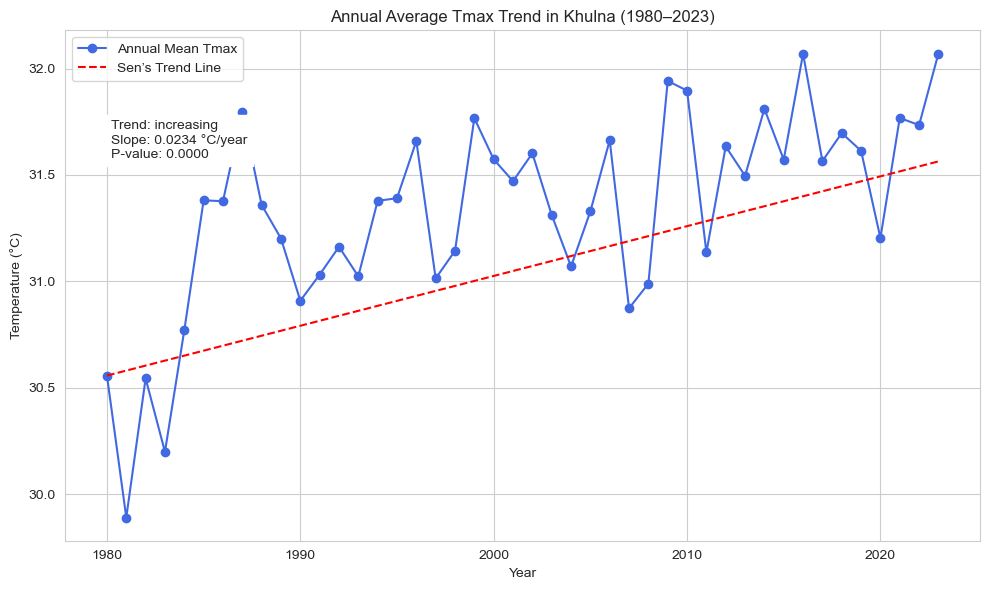

In [6]:
# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(years, tmax, marker='o', label="Annual Mean Tmax", color='royalblue')
plt.plot(years, trend_line, linestyle='--', color='red', label="Sen’s Trend Line")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Annual Average Tmax Trend in Khulna (1980–2023)")
plt.legend()
plt.annotate(f"Trend: {result.trend}\nSlope: {result.slope:.4f} °C/year\nP-value: {result.p:.4f}",
             xy=(0.05, 0.75), xycoords='axes fraction', fontsize=10, backgroundcolor='white')
plt.tight_layout()
#plt.savefig("khulna_tmax_trend.png", dpi=300)
plt.show()